# My first intern project

Mileage Prediction-Regression Analysis

Import library

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

Import Data

In [10]:
mpg = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')

In [11]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [13]:
mpg.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data preprocessing

In [14]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [18]:
mpg = mpg.dropna()

In [19]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data visualization

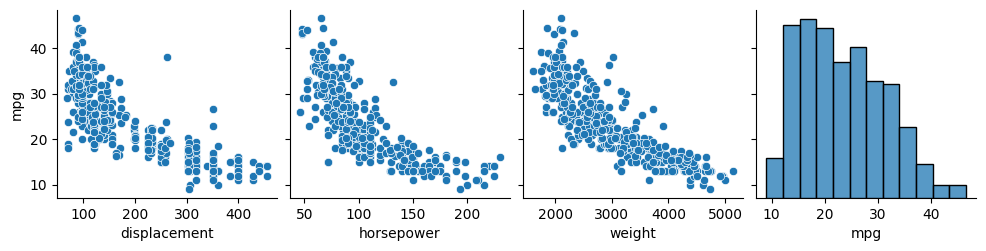

In [24]:
sns.pairplot(mpg,x_vars=["displacement","horsepower","weight","mpg"],y_vars=("mpg"));

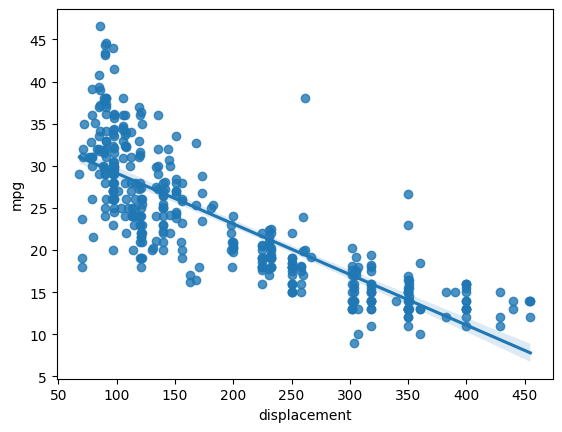

In [25]:
sns.regplot(x= 'displacement',y = 'mpg',data = mpg);

Define Target Variable y and feature x

In [26]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [27]:
y = mpg['mpg']

In [28]:
y.shape

(392,)

In [31]:
x = mpg[['displacement','horsepower','weight']]

In [32]:
x.shape

(392, 3)

In [33]:
x

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449
...,...,...,...
393,140.0,86.0,2790
394,97.0,52.0,2130
395,135.0,84.0,2295
396,120.0,79.0,2625


Scaling data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
ss = StandardScaler()

In [44]:
x

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449
...,...,...,...
393,140.0,86.0,2790
394,97.0,52.0,2130
395,135.0,84.0,2295
396,120.0,79.0,2625


Train Test Split Data

In [48]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2529)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 3), (118, 3), (274,), (118,))

Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
lr.intercept_

44.36916760769084

In [63]:
lr.coef_

array([-0.00984646, -0.0397766 , -0.00497413])

Predict Test Data

In [64]:
y_pred = lr.predict(x_test)

In [65]:
y_pred

array([18.56200088, 15.09966671, 14.28906452, 23.73225419, 29.79095515,
       23.67870208, 26.67995215, 24.54908598, 14.98520925, 11.86160769,
       24.28920869, 27.83536508, 31.51213824, 30.97800844, 18.34683144,
       19.3873208 , 28.18386588, 32.13311278, 31.06373768, 27.1389871 ,
       18.74600075, 22.53794289, 26.15079461, 32.45681187, 20.7325611 ,
        8.92877569, 22.17335679, 18.1803985 , 24.97875415, 15.58913365,
       23.15970895, 17.09090006, 10.16138487, 29.92971856, 20.47564338,
       29.05610429, 24.45696681, 21.75629216, 10.4493306 , 13.1003432 ,
       21.37101936, 19.92450809,  6.31238414, 17.73572727, 22.53296876,
       29.25973817, 13.56807559, 25.79109368, 29.46805079, 22.4529166 ,
       21.98263998, 16.55173108, 23.98429383, 30.0747005 , 10.06134859,
       10.00264491, 28.14904698, 23.4113871 , 20.09381135, 30.64664311,
       20.87114376, 26.76103229, 22.79342291, 14.16471131, 24.70074839,
       26.94865688, 15.25988644, 24.14622086, 30.89900031, 14.99

Model Accuracy

In [70]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [71]:
mean_absolute_error(y_test,y_pred)

3.327666684781017

In [72]:
mean_absolute_percentage_error(y_test,y_pred)

0.14737821978403995

In [73]:
r2_score(y_test,y_pred)

0.7032428089056533

Polynomial Regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [76]:
x_train2 = poly.fit_transform(x_train)

In [77]:
x_test2 = poly.fit_transform(x_test)

In [78]:
lr.fit(x_train2,y_train)

LinearRegression()

In [79]:
lr.intercept_

56.05645562888603

In [80]:
lr.coef_

array([-7.58701664e-02, -2.03875198e-01, -3.50770412e-03,  4.51934927e-04,
        1.45352578e-06,  6.28064856e-06])

In [81]:
y_pred_poly = lr.predict(x_test2)

Model Accuracy

In [82]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [83]:
mean_absolute_error(y_test,y_pred_poly)

2.8700095283314635

In [84]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12253667214489564

In [85]:
r2_score(y_test,y_pred_poly)

0.7477264306213838